Tugas Auto-encoder-Deconder

melakukan rekontruksi pixel-pixel noise menjadi pixel-pixel non-noise(bagus)

NAMA : SATRIA NUR SAPUTRO

KELAS : KANGAE

# Download dataset
1. kotak noise : https://drive.google.com/file/d/1-1WSH55uFvYMH5F21VZvNzf0OsDlTjWz/view?usp=sharing
2. Target kotak noise :  https://drive.google.com/file/d/1-0qdvQqkJ9eWnu4au1XnvbGzrUjtHD_k/view?usp=sharing
3. Test : https://drive.google.com/file/d/1zA7RYHEQcSgYdRJKKz6M239Fzdywxpw3/view?usp=sharing

# Preprocessing


In [1]:
#unzip dataset kotak noise
!unzip '/content/drive/MyDrive/kuis3/kotak_noise.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: kotak_noise/3441.bmp    
  inflating: kotak_noise/9953.bmp    
  inflating: kotak_noise/8842.bmp    
  inflating: kotak_noise/9917.bmp    
  inflating: kotak_noise/597.bmp     
  inflating: kotak_noise/5247.bmp    
  inflating: kotak_noise/1317.bmp    
  inflating: kotak_noise/1656.bmp    
  inflating: kotak_noise/1921.bmp    
  inflating: kotak_noise/9539.bmp    
  inflating: kotak_noise/5519.bmp    
  inflating: kotak_noise/5257.bmp    
  inflating: kotak_noise/7901.bmp    
  inflating: kotak_noise/518.bmp     
  inflating: kotak_noise/9181.bmp    
  inflating: kotak_noise/5212.bmp    
  inflating: kotak_noise/7095.bmp    
  inflating: kotak_noise/2600.bmp    
  inflating: kotak_noise/904.bmp     
  inflating: kotak_noise/9716.bmp    
  inflating: kotak_noise/237.bmp     
  inflating: kotak_noise/1916.bmp    
  inflating: kotak_noise/5063.bmp    
  inflating: kotak_noise/5256.bmp    
  inflating: kotak_noise/8786

In [2]:
#unzip dataset target kotak noise
!unzip '/content/drive/MyDrive/kuis3/target.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: target/3441.bmp         
  inflating: target/9953.bmp         
  inflating: target/8842.bmp         
  inflating: target/9917.bmp         
  inflating: target/597.bmp          
  inflating: target/5247.bmp         
  inflating: target/1317.bmp         
  inflating: target/1656.bmp         
  inflating: target/1921.bmp         
  inflating: target/9539.bmp         
  inflating: target/5519.bmp         
  inflating: target/5257.bmp         
  inflating: target/7901.bmp         
  inflating: target/518.bmp          
  inflating: target/9181.bmp         
  inflating: target/5212.bmp         
  inflating: target/7095.bmp         
  inflating: target/2600.bmp         
  inflating: target/904.bmp          
  inflating: target/9716.bmp         
  inflating: target/237.bmp          
  inflating: target/1916.bmp         
  inflating: target/5063.bmp         
  inflating: target/5256.bmp         
  inflating: target/8786.bmp 

In [3]:
#unzip dataset test auto encoder-decoder
!unzip '/content/drive/MyDrive/kuis3/soal.zip'

Archive:  /content/drive/MyDrive/kuis3/soal.zip
   creating: soal/
  inflating: soal/490.bmp            
  inflating: soal/732.bmp            
  inflating: soal/567.bmp            
  inflating: soal/891.bmp            
  inflating: soal/935.bmp            
  inflating: soal/589.bmp            
  inflating: soal/681.bmp            
  inflating: soal/282.bmp            
  inflating: soal/610.bmp            
  inflating: soal/553.bmp            
  inflating: soal/539.bmp            
  inflating: soal/615.bmp            
  inflating: soal/600.bmp            
  inflating: soal/656.bmp            
  inflating: soal/622.bmp            
  inflating: soal/504.bmp            
  inflating: soal/405.bmp            
  inflating: soal/932.bmp            
  inflating: soal/487.bmp            
  inflating: soal/370.bmp            
  inflating: soal/476.bmp            
  inflating: soal/915.bmp            
  inflating: soal/46.bmp             
  inflating: soal/173.bmp            
  inflating: soal/689

In [68]:
#import semua library
import glob
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from keras.models import Model
from keras.layers import Conv2D,Conv2DTranspose, MaxPooling2D, Dense, Input, Conv2D, UpSampling2D, BatchNormalization,concatenate,AveragePooling2D,Add,MaxPooling2D,MaxPool2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential, Model
from keras.callbacks import EarlyStopping

In [6]:
#lakukan pengumpulan data ke satu variabel (kotak_noise, target, soal)
kotak_noise = sorted(glob.glob('/content/kotak_noise/*.bmp'))
target = sorted(glob.glob('/content/target/*.bmp'))
soal= sorted(glob.glob('/content/soal/*.bmp'))

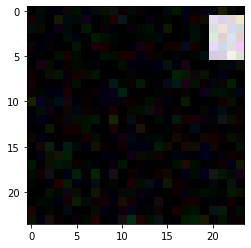

In [8]:
#tampilkan kotak noise index 1
kotak = cv2.imread(kotak_noise[1])
plt.imshow(kotak)

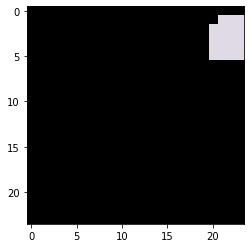

In [9]:
#tampilkan target index 1
target_jadi = cv2.imread(target[1])
plt.imshow(target_jadi)

In [29]:
#list_kosong
xkotak= []
ytarget= []
soaltest= []

#lakukan pembacaan dan resize ke ukuran 52 x 52 agar lebih efisien
for kodok in kotak_noise:
  x = cv2.imread(kodok)
  _ = cv2.resize(x ,(52,52))
  xkotak.append(_)

for kodok in target:
  x = cv2.imread(kodok)
  _ = cv2.resize(x ,(52,52))
  ytarget.append(_)

for kodok in soal:
  x = cv2.imread(kodok)
  _ = cv2.resize(x ,(52,52))
  soaltest.append(_)

In [34]:
#fungsi normalisasi
def preprocess(array):
    """
    normalisasi gambar
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 52, 52, 3))
    return array

In [31]:
#ubah menjadi asarray
xtrain = np.asarray(xkotak)
ytest = np.asarray(ytarget)
xsoaltest = np.asarray(soaltest)

In [41]:
#lakukan preprocessing
train_data = preprocess(xtrain)
target_data = preprocess(ytest)
test_soaltest = preprocess(xsoaltest)

In [42]:
#ukuran data
print(train_data.shape)
print(target_data.shape)
print(test_soaltest.shape)

(10000, 52, 52, 3)
(10000, 52, 52, 3)
(1000, 52, 52, 3)


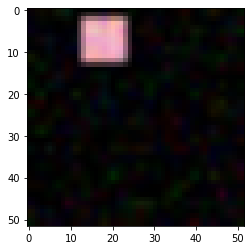

In [47]:
#tampilkan kotak noise preprocessing index 2
train_tampil = (train_data[2])
plt.imshow(train_tampil)

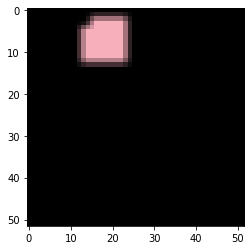

In [43]:
#tampilkan target preprocessing index 2
target_tampil = (target_data[2])
plt.imshow(target_tampil)

In [72]:
#pembuatan model
#melakukan dari besar ke kecil lalu ubah ke ukuran yang inputan kembali dari kecil ke besar
size = 4
def create_model():
  input=Input((52,52,3),name='Input')
  x=Conv2D(size*2*2*2,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu',padding='same',name='Conv2d_1')(input)
  x=Conv2D(size*2*2*2,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu',padding='same',name='Conv2d_2')(x)
  x=MaxPool2D(name='Maxpool_2')(x)
  x=Conv2D(size*2*2*2,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu',padding='same',name='Conv2d_3')(x)
  x=MaxPool2D(name='Maxpool_3')(x)

  x=Conv2DTranspose(size*2*2*2,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu',padding='same',name='Conv2dt_4')(x)
  x=UpSampling2D(name='Upsample_1')(x)
  x=Conv2DTranspose(size*2*2*2,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu',padding='same',name='Conv2dt_5')(x)
  x=UpSampling2D(name='Upsample_2')(x)
  x=Conv2DTranspose(size*2*2*2,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu',padding='same',name='Conv2dt_6')(x)
  x=Conv2D(3,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu',padding='same',name='Conv2d_5')(x)
  model=Model(input,x)
  return model
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(3e-4), loss='mse')
model.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 52, 52, 3)]       0         
                                                                 
 Conv2d_1 (Conv2D)           (None, 52, 52, 32)        896       
                                                                 
 Conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 Maxpool_2 (MaxPooling2D)    (None, 26, 26, 32)        0         
                                                                 
 Conv2d_3 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 Maxpool_3 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 Conv2dt_4 (Conv2DTranspose)  (None, 13, 13, 32)       924

In [73]:
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
#lakukan EarlyStopping untuk menghindari overfitting dan modelcheckpoint untuk save model terbaik
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-4,
        patience=5,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='/content/weights1.h5',
        monitor='val_loss', 
        mode='min', 
        save_best_only=True,
        save_weights_only=True,
    )
]

In [74]:
history = model.fit(
    train_data,
    target_data,
    epochs=100,
    batch_size=2,
    validation_split= 0.1,
    callbacks=callbacks
)

Epoch 1/100
4500/4500 [==============================] - 19s 4ms/step - loss: 8.9012e-04 - val_loss: 1.7290e-04
Epoch 2/100
4500/4500 [==============================] - 18s 4ms/step - loss: 2.7150e-04 - val_loss: 1.1140e-04
Epoch 3/100
4500/4500 [==============================] - 19s 4ms/step - loss: 1.6244e-04 - val_loss: 1.8371e-04
Epoch 4/100
4500/4500 [==============================] - 18s 4ms/step - loss: 1.6175e-04 - val_loss: 5.4699e-05
Epoch 5/100
4500/4500 [==============================] - 21s 5ms/step - loss: 1.3224e-04 - val_loss: 5.2703e-05
Epoch 6/100
4500/4500 [==============================] - 24s 5ms/step - loss: 9.6638e-05 - val_loss: 3.8960e-05
Epoch 7/100
4500/4500 [==============================] - 22s 5ms/step - loss: 9.3752e-05 - val_loss: 3.4338e-05
Epoch 8/100
4500/4500 [==============================] - 22s 5ms/step - loss: 7.2688e-05 - val_loss: 3.5695e-05
Epoch 9/100
4500/4500 [==============================] - 24s 5ms/step - loss: 7.9593e-05 - val_loss: 8.6

# visualisasi

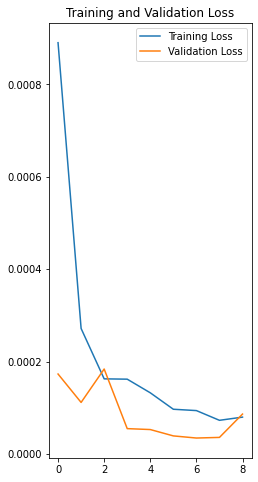

In [76]:
#visualisasi hasil plotting
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(9)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [77]:
def display(array1, array2):
    """
    display data test dan prediksi
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(52, 52,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(52, 52,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

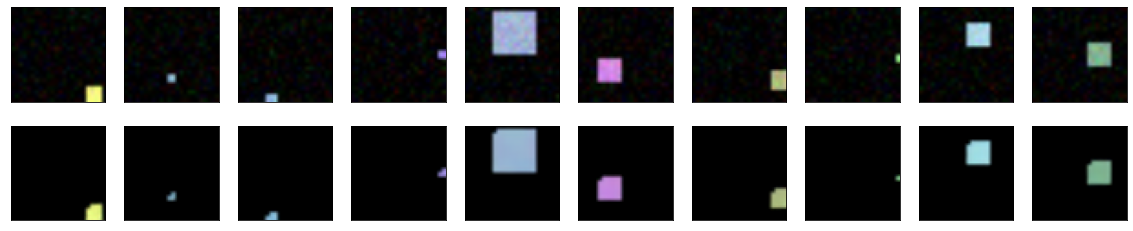

In [78]:
#lakukan prediksi dataset test soal
predictions = model.predict(test_soaltest)
display(test_soaltest, predictions)

# model save dan prediksi seluruh test soal dan simpan hasilnya

In [79]:
#save model
model.save('/content/model_autoencoderdecoder.h5')

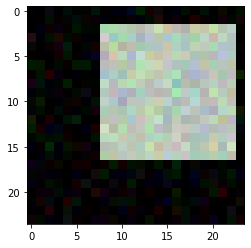

In [86]:
#coba gambar di soal index 1
gambar = cv2.imread(soal[1]).astype("float32") / 255.0
plt.imshow(gambar)

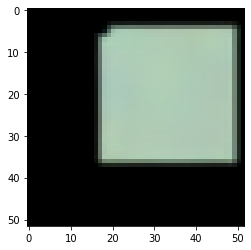

In [87]:
#hasil prediksi
test = cv2.resize(gambar,(52,52))
test = test.reshape(1,52,52,3)
predictions = model.predict(test)
plt.imshow(predictions[0])

In [80]:
#lakukan prediksi lalu simpan hasil prediksi ke folder 
for i in sorted(os.listdir('/content/soal')): #lakukan perlulangan di folder soal dan urutkan
  nama = '/content/soal/'+i
  array = cv2.imread(nama) #membaca foto
  resize = cv2.resize(array,(52,52)) #resize
  array = np.asarray(resize) #buat asarray
  normalisasi = array.astype("float32") / 255.0 #normalisasi
  hasil_reshape = np.reshape(normalisasi, (1, 52, 52, 3)) #reshape
  predictions = model.predict(hasil_reshape) #prediksi
  baru = '/content/hasil_testkotakterbagus/'+i #nama hasil 
  cv2.imwrite(baru,predictions[0]* 255) #simpan data dengan kalikan * 255 untuk kembali kesemula RGB nya